In [2]:
from guardrails import Guard, install
VALIDATOR_NAME="CompetitorCheck"
VALIDATOR_URI="hub://guardrails/competitor_check"
kwargs = {
    "competitors": ["OpenAI", "Together", "Cohere", "Anthropic", "Databricks", "Google"]
}


ValidatorInstall = install(VALIDATOR_URI, quiet=True, install_local_models=True)

Installing hub://guardrails/competitor_check...

/home/zayd/workspace/validator-benchmarks/.venv/lib/python3.11/site-packages/torch/cuda/__init__.py:654: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


✅Successfully installed guardrails/competitor_check!

In [3]:
Validator = ValidatorInstall.__getattribute__(VALIDATOR_NAME)


In [45]:
import time

input_lengths = []
local_latencies = []
remote_latencies = []

local_validation = Guard().use(Validator(
    competitors=["OpenAI", "Together", "Amazon", "Microsoft", "Databricks", "Google", "IBM", "Facebook", "Baidu", "Tencent", "AliBaba", "Tesla", "Palantir"],
    use_local=True,
    # **kwargs
))

remote_validation = Guard().use(Validator(
    competitors=["OpenAI", "Together", "Amazon", "Microsoft", "Databricks", "Google", "IBM", "Facebook", "Baidu", "Tencent", "AliBaba", "Tesla", "Palantir"],
    use_local=False,
    # **kwargs
))

# Run local validation for each line in data.csv
with open("./data.csv") as f:
    for line in f:
        start = time.time()  
        local_validation.validate(line)
        local_latency = time.time() - start

        remote_start = time.time()
        remote_validation.validate(line)
        remote_latency = time.time() - remote_start

        input_lengths.append(len(line))
        local_latencies.append(local_latency)
        remote_latencies.append(remote_latency)

    f.close()

/home/zayd/workspace/validator-benchmarks/.venv/lib/python3.11/site-packages/thinc/shims/pytorch.py:253: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(

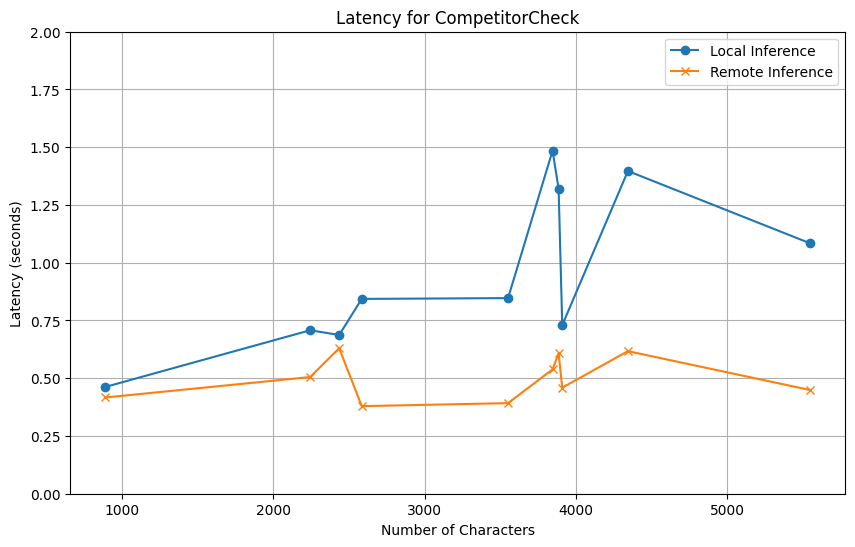

In [46]:
import matplotlib.pyplot as plt


zipped = zip(input_lengths, local_latencies, remote_latencies)
zipped = sorted(zipped, key=lambda x: x[0])
input_lengths, local_latencies, remote_latencies = zip(*zipped)


plt.figure(figsize=(10, 6))
plt.plot(input_lengths, local_latencies, label='Local Inference', marker='o')
plt.plot(input_lengths, remote_latencies, label='Remote Inference', marker='x')
plt.xlabel('Number of Characters')
plt.ylabel('Latency (seconds)')
plt.title('Latency for CompetitorCheck')
plt.legend()
plt.grid(True)
plt.ylim(0, 2)  # Fixed y-axis limit for better visibility
plt.show()